LINK TO DATASET: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [1]:
import pandas as pd # pandas help in reading of the data and management of data
import numpy as np #mathematical computation
import matplotlib.pyplot as plt #Used for Plotting of data
import seaborn as sns 

In [2]:
df = pd.read_csv("/content/AB_NYC_2019.csv") #To read a csv file

In [3]:
df.head() #Head of the csv file i.e. first five elements 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape #It shows no. of rows and columns present

(48895, 16)

In [5]:
df.dtypes #It shows the data types present in the whole data

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
df = df.drop(["id","host_id","latitude","longitude","last_review"],axis=1) #It is used to drop unnecessary data present in csv file

In [8]:
df.count() #The no. of rows present in that file

name                              48879
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [9]:
df.head() 

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [10]:
duplicate_rows_df = df[df.duplicated()] #To find duplicate items present in dataset
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (21, 11)


In [11]:
df.count()#Total no. of rows of that particular field

name                              48879
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [12]:
df = df.drop_duplicates()#To delete duplicate items

In [13]:
df.count()

name                              48858
host_name                         48853
neighbourhood_group               48874
neighbourhood                     48874
room_type                         48874
price                             48874
minimum_nights                    48874
number_of_reviews                 48874
reviews_per_month                 38842
calculated_host_listings_count    48874
availability_365                  48874
dtype: int64

In [14]:
print(df.isnull().sum())#To find any null value present 

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10032
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [15]:
df = df.dropna() #Drop all the null values present
df.count()

name                              38820
host_name                         38820
neighbourhood_group               38820
neighbourhood                     38820
room_type                         38820
price                             38820
minimum_nights                    38820
number_of_reviews                 38820
reviews_per_month                 38820
calculated_host_listings_count    38820
availability_365                  38820
dtype: int64

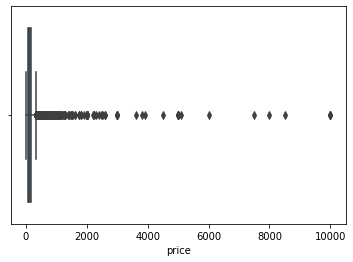

In [18]:
sns.boxplot(x=df["price"]) #Boxplot is used to find range in which the data lies

In [19]:
def remove_outlier(col): #To remove unecessary space that is not to be used
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [20]:
lowage,upage=remove_outlier(df['price'])
df['price']=np.where(df['price']>upage,upage,df['price'])
df['price']=np.where(df['price']<lowage,lowage,df['price'])

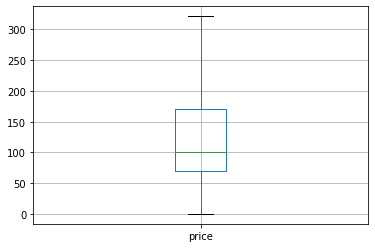

In [21]:
df.boxplot(column=["price"])
plt.show()

In [22]:
df.corr() #To find the correlation

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.014348,-0.038346,-0.036102,0.121496,0.087850
minimum_nights,0.014348,1.000000,-0.069371,-0.121719,0.073478,0.101676
number_of_reviews,-0.038346,-0.069371,1.000000,0.549694,-0.059789,0.193448
reviews_per_month,-0.036102,-0.121719,0.549694,1.000000,-0.009432,0.185945
calculated_host_listings_count,0.121496,0.073478,-0.059789,-0.009432,1.000000,0.182966
availability_365,0.087850,0.101676,0.193448,0.185945,0.182966,1.000000
